In [9]:
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


In [2]:
seed = 0
np.random.seed(seed)

In [3]:
np.shape(mnist.load_data())

C:\Users\poeun\anaconda3\envs\tf2.4\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(2, 2)

In [4]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()


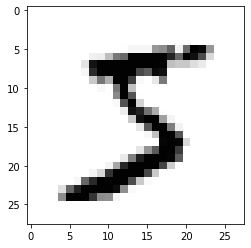

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
X_train.reshape(X_train.shape[0], 784)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784)
np_utils.to_categorical(Y_class_train, 10)
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [10]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [13]:
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), epochs=30,  
                    batch_size=200,callbacks=[early_stopping_callback])


Epoch 1/30
300/300 [==============================] - 16s 39ms/step - loss: 0.5200 - accuracy: 0.8553 - val_loss: 19.7237 - val_accuracy: 0.9551
Epoch 2/30
300/300 [==============================] - 3s 11ms/step - loss: 0.1359 - accuracy: 0.9611 - val_loss: 13.0656 - val_accuracy: 0.9686
Epoch 3/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0849 - accuracy: 0.9761 - val_loss: 11.8168 - val_accuracy: 0.9739
Epoch 4/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0571 - accuracy: 0.9841 - val_loss: 10.4917 - val_accuracy: 0.9765
Epoch 5/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0440 - accuracy: 0.9878 - val_loss: 10.9699 - val_accuracy: 0.9780
Epoch 6/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0321 - accuracy: 0.9915 - val_loss: 12.0946 - val_accuracy: 0.9764
Epoch 7/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0253 - accuracy: 0.9936 - val_loss: 11.8431 - val_accuracy: 0.9

In [16]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 13.6422 - accuracy: 0.9822

 Test Accuracy: 0.9822


In [18]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [20]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)/255
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)/255

In [21]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [22]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [25]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), 
                 input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200)


![image](https://user-images.githubusercontent.com/78655692/142092879-7d17bebd-3448-4c82-9add-10c8ff3aef58.png)

In [28]:
from tensorflow.keras.datasets import reuters

In [31]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data()